#### Data & Network Analysis of Wikipedia Pages

##### Wikipedia Pages: Cloud Computing & Distributed Computing

Performed data and network analysis of Cloud Computing and Distributed Computing wikipedia pages to gain insights about the relationships between the contents and topics. Some of the hyperlinks were unique to Cloud Computing, unique to Distributed Computing or common to both Cloud Computing and Distributed Computing Wikipedia pages.

#### Networks of Hyperlinked Wikipedia Pages 
###### Originating from "Cloud Computing" and "Distributed Computing Architecture"

In [1]:
import wikipedia
import random
import networkx as nx
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(context="paper", font="monospace")
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import operator
from collections import Counter
from itertools import combinations, permutations
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import write_dot
import warnings; warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import itertools as it

import warnings
warnings.filterwarnings('ignore')
import community

###### WIKIPEDIA PAGES: Cloud Computing" & "Distributed Computing Architecture

In [2]:
# Cloud Computing" & "Distributed Computing Architecture
page1 = wikipedia.page('Cloud computing')
page2 = wikipedia.page('Distributed computing architecture') 

p1=sorted([w.replace(" ","_") for w in page1.links])
p2=sorted([w.replace(" ","_") for w in page2.links])

print ("The %i hyperlinks from the Wikipedia page on %s are:" %(len(p1),page1.title))
print
for i in range(len(p1)):
    print ("%i. %s" %(i+1,p1[i]))
print
print ("The %i hyperlinks from the Wikipedia page on %s are:" %(len(p2),page2.title))
print
for i in range(len(p1)):
    print ("%i. %s" %(i+1,p1[i]))
print
p12=set(p1).intersection(set(p2))
p12=list(p12)
print ("The %i common hyperlinks from the Wikipedia pages on %s and %s are:" %(len(p12),page1.title,page2.title))
print
for i in range(len(p12)):
    print ("%i. %s" %(i+1,p12[i]))

The 396 hyperlinks from the Wikipedia page on Cloud computing are:
1. ARPANET
2. ASN.1
3. AT&T
4. Abiquo_Enterprise_Edition
5. Access-point
6. Alpha7
7. Amazon.com
8. Amazon_(company)
9. Amazon_Elastic_Compute_Cloud
10. Amazon_Web_Services
11. Amdahl's_law
12. Analysis_of_parallel_algorithms
13. Analytics
14. Andy_Hertzfeld
15. Apache_CloudStack
16. Api
17. AppScale
18. Apple_Inc.
19. Application_checkpointing
20. Application_programming_interface
21. ArXiv
22. Array_data_structure
23. As_a_service
24. Asymmetric_multiprocessing
25. Ateji_PX
26. Audit_log
27. Automatic_parallelization
28. Autonomic_computing
29. Back-end_database
30. Bare-metal_server
31. Barrier_(computer_science)
32. Barriers_to_entry
33. Bibcode
34. Biblioteca_Nacional_de_España
35. Bibliothèque_nationale_de_France
36. Big_data
37. Bit-level_parallelism
38. Block_storage
39. Bluemix
40. Boost_(C++_libraries)
41. Box_(company)
42. Bruce_Schneier
43. Bulldozer_(microarchitecture)
44. Business
45. Business_continuity
4

In [3]:
eds1=[]
for pp in p1:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    except wikipedia.exceptions.DisambiguationError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p1))
    if len(ih)>0:
#         print ("%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih))))
#         print
        for q in ih:
            eds1.append((pp,q))
print (len(eds1))

21191


In [4]:
eds2=[]
for pp in p2:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    except wikipedia.exceptions.DisambiguationError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p2))#changed p to p2
    if len(ih)>0:
#         print ("%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih))))
#         print
        for q in ih:
            eds2.append((pp,q))
print (len(eds2))

17250


In [5]:
eds=list(set(eds1+eds2))
len(eds)

29955

###### DIRECTED GRAPH
1.1. Graph (Directed)

1.2. Graph Plot (in NetworkX or/and Gephi)

1.3. Diagnostics (counts of nodes & edges, description of connectivity type, counts of graph density and reciprocity)

1.4. Centralities (with dataframes, plots and pairplots)

In [6]:
# 1.1. Directed Graph

G=nx.DiGraph()
G.add_edges_from(eds)
ss="The graph of the %i Wikipedia webpages which are hyperlinks of the Wikipedia pages on '%s' and on '%s' has: \n %i nodes and %i edges" %(len(G.nodes()),page1.title,page2.title,len(G.nodes()),len(G.edges()))
print (ss)

The graph of the 619 Wikipedia webpages which are hyperlinks of the Wikipedia pages on 'Cloud computing' and on 'Distributed computing' has: 
 619 nodes and 29955 edges


In [7]:
excluded_list = ["International_Standard_Book_Number", "Digital_object_identifier" , "Integrated_Authority_File", "International_Standard_Serial_Number","PubMed_Identifier", "Library_of_Congress_Control_Number"]

for x in excluded_list:
    if x in list(G.nodes()):
        print (x)
    else:
        print (x,": Not found!")

International_Standard_Book_Number
Digital_object_identifier
Integrated_Authority_File
International_Standard_Serial_Number
PubMed_Identifier
Library_of_Congress_Control_Number


In [8]:
for x in excluded_list:
    G.remove_node(x)

for x in excluded_list:
    if x in list(G.nodes()):
        print (x)
    else:
        print (x,":   Not found!")

International_Standard_Book_Number :   Not found!
Digital_object_identifier :   Not found!
Integrated_Authority_File :   Not found!
International_Standard_Serial_Number :   Not found!
PubMed_Identifier :   Not found!
Library_of_Congress_Control_Number :   Not found!


###### 1.2. Graph Plot (in NetworkX or/and Gephi)

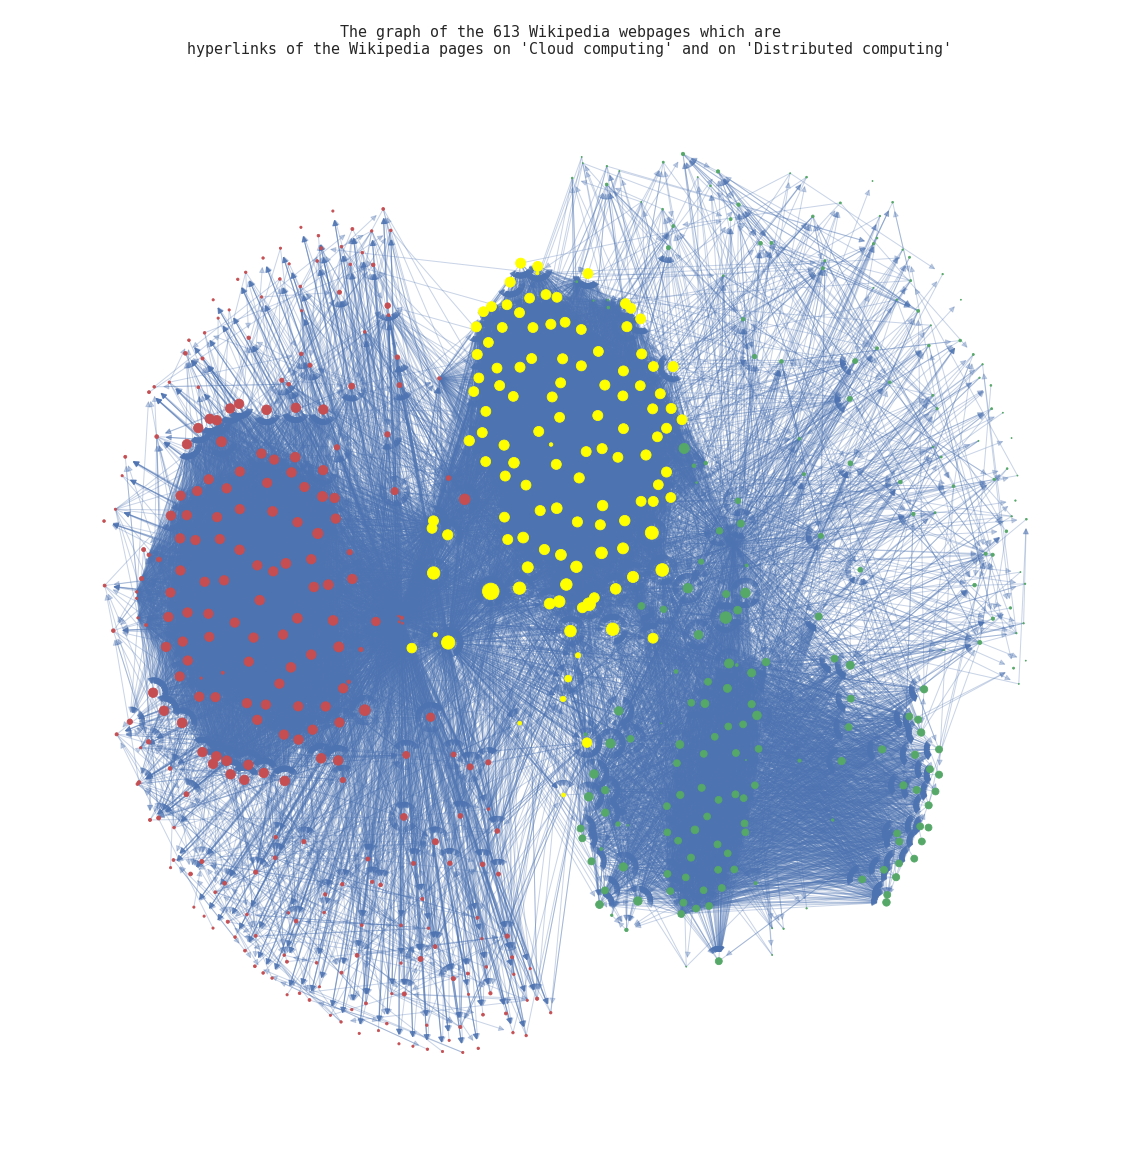

In [9]:
# 1.2. Graph Plot (in NetworkX or/and Gephi)

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,2.)

type={}
for n in G.nodes():
    if n in p1 and n not in p2:
        type[n]='r'
    elif n in p2 and n not in p1:
        type[n]='g'
    else:
        type[n]='yellow'
plt.figure(figsize=(20,20));

# Python 2.7 syntax
# nodes = nx.draw_networkx_nodes(G, pos, node_color=type.values(),node_size=dict(G.in_degree()).values()) #, alpha=0.2)

# Python 3 syntax
nodes = nx.draw_networkx_nodes(G, pos, node_color=list(type.values()),node_size=list(dict(G.in_degree()).values()))

nx.draw_networkx_edges(G, pos,arrowsize=12, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="\nThe graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia pages on '%s' and on '%s'" %(len(G.nodes()),page1.title,page2.title)
plt.title(ss,fontsize=15);
# plt.margins(x=0.3, y=0) 

###### 1.3. DIAGNOSTICS: Count of nodes / edges, description of connectivity type, counts of graph density and reciprocity

In [10]:
if G.is_multigraph()==True:
    print ("G is a multigraph")
else:
    print ("G is a simple graph")
if nx.is_weighted(G)==True:
    print ("G is a weighted graph")
else:
    print ("G is an unweighted graph")
if G.is_directed()==True:
    print ("G is a directed graph")
else:
    print ("G is an undirected graph")    
if nx.is_bipartite(G)==True:
    print ("G is a bipartite graph")
else:
    print ("G is not a bipartite graph")    
if nx.is_tree(G)==True:
    print ("G is a tree")
else:
    print ("G is not a tree")    
if G.is_directed()==False:
    if nx.is_connected(G)==True:
        print ("G is a connected graph")
    else:
        print ("G is a disconnected graph and it has",nx.number_connected_components(G),"connected components")    
else:
    if nx.is_strongly_connected(G)==True:
        print ("G is a strongly connected graph")
    else:
        print ("G is not strongly connected and it has",nx.number_strongly_connected_components(G),"strongly connected components")
    if nx.is_weakly_connected(G)==True:
        print ("G is a weakly connected graph")
    else:
        print ("G is not weakly connected and it has",nx.number_weakly_connected_components(G),"weakly connected components")    
if len(list(nx.isolates(G)))>0:
    print ("G has",len(list(nx.isolates(G))),"isolates")
else:
    print ("G has no isolates")
    
print ("G has reciprocity = ", nx.reciprocity(G))

G is a simple graph
G is an unweighted graph
G is a directed graph
G is not a bipartite graph
G is not a tree
G is not strongly connected and it has 61 strongly connected components
G is a weakly connected graph
G has no isolates
G has reciprocity =  0.5243608297153883


###### 1.4. Centralities (with dataframes, plots and pairplots)

In [11]:
def create_centralities_list(G,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','betweenness','eigenvector','Katz','PageRank','HITS','load','communicability','current flow']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(G,nx.DiGraph):
                cent=nx.in_degree_centrality(G)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(G)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(G)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(G)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(G)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(G, nx.DiGraph):
                cent=nx.communicability_betweenness_centrality(G)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(G)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(G, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(G)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(G,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
            cent=nx.katz_centrality_numpy(G,1/phi-0.01)
            cent=nx.katz_centrality_numpy(G,.05)#,1/phi-0.01)
            
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent
#             valus[centr+'_%i' %pphi]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(G)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(G,nx.DiGraph):
                dd=nx.hits(G,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(G)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        else:
            continue
#         print '%s done!!!' %sstt
    return valus

dindices=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices=['degree','closeness','betweenness','eigenvector']

# Without 'communicability' and 'current flow' (undirected case)
dindicesd=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indicesd=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load']
# indicesd=['degree','closeness','betweenness','eigenvector']

dindicesdr=dindices
indicesdr=indices

# Plus 'node'
dindicesdrn=["node"]+dindices
indicesdrn=['node']+indices

def central_df(G,node,central_pd):
    central_pd[node]=central_pd.index.values
    if isinstance(G,nx.DiGraph):
        central_pd=central_pd[[node]+dindices]
    else:
        central_pd=central_pd[[node]+indices]
    central_pd[node]=central_pd.index.values
    central_pd.reset_index(drop = True, inplace = True)
    # central_pd=central_pd[['node']]
    central_pd.sort_values(node) #.head()
    # central_pd['node']=G.nodes()
    return central_pd

In [12]:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

node  out_degree  in_degree  \
0                                    ACM_SIGACT_News    0.006536   0.003268   
1                                           ALGOL_60    0.011438   0.083333   
2                                            ARPANET    0.027778   0.047386   
3                                              ASN.1    0.001634   0.009804   
4                                               AT&T    0.003268   0.019608   
5                        A_Discipline_of_Programming    0.008170   0.078431   
6                            A_Method_of_Programming    0.006536   0.078431   
7    A_Note_on_Two_Problems_in_Connexion_with_Graphs    0.165033   0.076797   
8                   A_Primer_of_ALGOL_60_Programming    0.196078   0.076797   
9                          Abiquo_Enterprise_Edition    0.160131   0.143791   
10                                 Abstraction_layer    0.011438   0.084967   
11                                      Access-point    0.003268   0.008170   
12                                    Addison–Wesley    0.000000   0.003268   
13                           Adriaan_van_Wijngaarden    0.009804   0.083333   
14                                          Aircraft    0.000000   0.001634   
15                                         Algorithm    0.024510   0.122549   
16                                  Algorithm_design    0.024510   0.117647   
17                                            Alpha7    0.155229   0.143791   
18                                        Amazon.com    0.026144   0.029412   
19                                  Amazon_(company)    0.024510   0.029412   
20                      Amazon_Elastic_Compute_Cloud    0.163399   0.035948   
21                               Amazon_Web_Services    0.183007   0.174837   
22                                      Amdahl's_law    0.173203   0.165033   
23                   Analysis_of_parallel_algorithms    0.183007   0.160131   
24                                         Analytics    0.003268   0.014706   
25                                    Andy_Hertzfeld    0.011438   0.014706   
26                                 Apache_CloudStack    0.161765   0.143791   
27                                               Api    0.029412   0.011438   
28                                          AppScale    0.169935   0.151961   
29                                        Apple_Inc.    0.045752   0.078431   
..                                               ...         ...        ...   
583                                             VLAN    0.000000   0.011438   
584                                VMware_vCloud_Air    0.004902   0.145425   
585                                 Vector_processor    0.181373   0.168301   
586                          Virtual_Machine_Manager    0.014706   0.156863   
587                   Virtual_Private_Cloud_OnDemand    0.004902   0.145425   
588                                Virtual_appliance    0.013072   0.151961   
589                                 Virtual_machines    0.044118   0.013072   
590                            Virtual_private_cloud    0.158497   0.147059   
591                          Virtual_private_network    0.003268   0.027778   
592                                  Virtual_reality    0.031046   0.044118   
593                                   Virtualization    0.034314   0.058824   
594                              Volunteer_computing    0.009804   0.014706   
595                                       Wakame-vdc    0.156863   0.143791   
596                                        WaveMaker    0.156863   0.143791   
597                    Weakest_precondition_calculus    0.156863   0.076797   
598                                          Web_API    0.156863   0.150327   
599                                          Web_app    0.009804   0.009804   
600                                    Web_computing    0.638889   0.006536   
601                                  Web_engineering    0.001634   0.013072   
602                

In [13]:
h = 5 # Number of top centralities
cdf=central_df(G,node,central_pd)
DFC={}
for c in dindices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc

for k,v in DFC.items():
    print ("centrality index:",k)
    print (v)

centrality index: out_degree
                             node  out_degree
0  Concurrency_(computer_science)    0.687908
1                 Computing_power    0.638889
2               Smarter_Computing    0.638889
3                   Web_computing    0.638889
4            Cloud_infrastructure    0.638889
centrality index: in_degree
                                 node  in_degree
0                    Computer_network   0.442810
1      Concurrency_(computer_science)   0.289216
2                  Parallel_computing   0.277778
3                   Computer_hardware   0.267974
4  Synchronization_(computer_science)   0.263072
centrality index: closeness
                             node  closeness
0                Computer_network   0.573004
1               Computer_hardware   0.509337
2              Parallel_computing   0.496855
3  Concurrency_(computer_science)   0.494989
4                        Internet   0.493137
centrality index: betweenness
                             node  betweennes

In [14]:
excluded_list = ["International_Standard_Book_Number", "Digital_object_identifier" , "Integrated_Authority_File", "International_Standard_Serial_Number","PubMed_Identifier", "Library_of_Congress_Control_Number"]

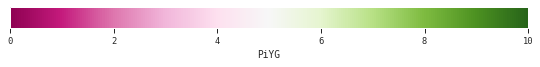

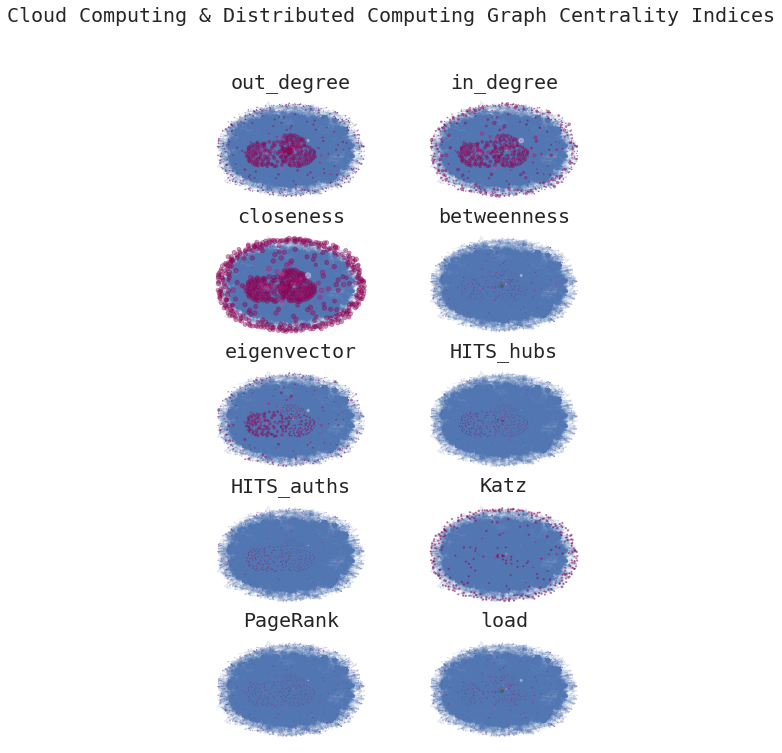

In [35]:
#adjusted sizes of nodes to 50

name="Cloud Computing & Distributed Computing Graph"

pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cmap = mpl.cm.PiYG
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
norm=norm,
orientation='horizontal')
cb1.set_label('PiYG')
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[50*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #pink, yellow, green
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.1)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

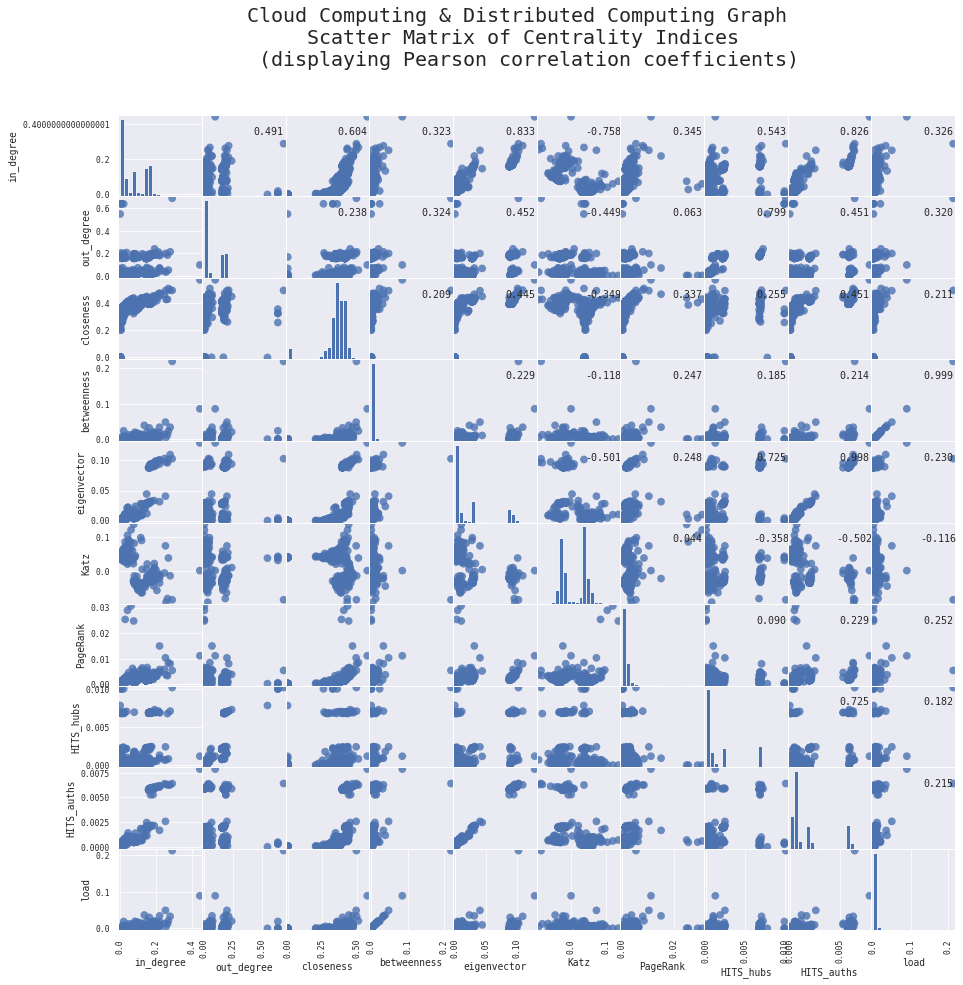

In [36]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

### CO-LINKED UNDIRECTED GRAPH

1.1.1. Co-Linked Graph (Undirected)

1.1.2. Diagnostics (counts of nodes & edges, description of connectivity type, counts of graph density)

1.1.3. Graph Plot (in NetworkX or/and Gephi)

1.1.4. Centralities (with dataframes, plots and pairplots)

1.1.5. Communities (with membership plots and colored community partitioned graph plot)

In [37]:
G2=G.copy()
medgesout=[]
n_out=[n for n in G2.nodes() if G2.out_degree(n)>1]
for n in n_out:
    nn=list(G2.successors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesout.append((j[0],j[1]))

name="the corresponding to G induced co-linked undirected graph"
Gcout=nx.MultiGraph()
Gcout.add_edges_from(medgesout)
Gcout=nx.MultiGraph(Gcout,name=name)

Gcout1=Gcout.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcout1.edges()).items()]
Gcout1 = nx.Graph(weight)
edge_width=[Gcout1[u][v]['weight'] for u,v in Gcout1.edges()]

In [38]:
print ("Gcout is %s with %i nodes and %i edges" %(str(Gcout),len(Gcout1.nodes()),len(Gcout1.edges())))
if nx.is_weighted(Gcout1)==True:
    print ("Gcout is a weighted undirected graph")
else:
    print ("Gcout is an unweighted undirected graph")
if nx.is_connected(Gcout)==True:
    print ("Gcout is a connected graph")
else:
    print ("Gcout is a disconnected graph and it has",nx.number_connected_components(Gcout),"connected components")    
print ("The density of Gcout is %.3f" %nx.density(Gcout))

Gcout is the corresponding to G induced co-linked undirected graph with 612 nodes and 137915 edges
Gcout is a weighted undirected graph
Gcout is a connected graph
The density of Gcout is 9.180


In [39]:
nx.degree(Gcout1)

DegreeView({'Systems_engineering': 438, 'Software_as_a_service': 447, 'Platform_as_a_service': 445, 'Engineering': 424, 'Security_engineering': 424, 'Information_technology_engineering': 422, 'Performance_engineering': 426, 'Infrastructure_as_a_service': 444, 'Web_engineering': 429, 'Software_engineering': 611, 'Starvation_(computer_science)': 611, 'Grid_computing': 611, 'Block_storage': 422, 'Non-uniform_memory_access': 611, 'Back-end_database': 422, 'Mobile_cloud_computing': 422, 'OpenMP': 611, 'Eucalyptus_(software)': 441, 'Startup_company': 429, 'Cloudlet': 422, 'Client–server_model': 611, 'Load_balancer': 422, 'EScience': 422, 'Vector_processor': 611, 'Application_programming_interface': 611, 'Biblioteca_Nacional_de_España': 424, 'Sandbox_(Cloud)': 422, 'Message_Passing_Interface': 611, 'Cloud_computing_issues': 422, 'G_Suite': 441, 'Business_continuity': 422, 'Process_(computing)': 611, 'Systems_architecture': 422, 'Libguestfs': 441, 'Manycore_processor': 611, 'Thread_(computing)

In [40]:
# import operator
# 609 used was based on the Cloud Computing & Distributed Computing Architecture data . 
x = dict(nx.degree(Gcout1))
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
counter = 0
for k,v in sorted_x:
    if v == 609:
        counter += 1
    
    print(k,v)
print (counter)

Software_engineering 611
Starvation_(computer_science) 611
Grid_computing 611
Non-uniform_memory_access 611
OpenMP 611
Client–server_model 611
Vector_processor 611
Application_programming_interface 611
Message_Passing_Interface 611
Process_(computing) 611
Manycore_processor 611
Thread_(computing) 611
Dryad_(programming) 611
Speedup 611
Parallel_random-access_machine 611
Instruction-level_parallelism 611
Cache-only_memory_architecture 611
Bulldozer_(microarchitecture) 611
Chapel_(programming_language) 611
Embarrassingly_parallel 611
Cache_coherence 611
Gustafson's_law 611
MIMD 611
Single_instruction,_multiple_threads 611
Concurrency_(computer_science) 611
Software_lockout 611
CUDA 611
Race_condition 611
SIMD 611
Array_data_structure 611
Parallel_external_memory 611
Parallel_programming_model 611
Cilk 611
Memory_coherence 611
ZPL_(programming_language) 611
Supercomputer 611
Semiconductor_memory 611
Dataflow_programming 611
Preemption_(computing) 611
OpenHMPP 611
Pipeline_(computing) 611


A_Discipline_of_Programming 341
A_Note_on_Two_Problems_in_Connexion_with_Graphs 341
DJP_algorithm 341
Ole-Johan_Dahl 341
Deadly_embrace 341
Concurrent_algorithm 341
Fault-tolerant_system 341
On_the_Cruelty_of_Really_Teaching_Computer_Science 341
Dekker's_algorithm 341
Dutch_national_flag_problem 341
Guarded_Command_Language 341
Shlomi_Dolev 341
Tracing_garbage_collection 341
Structured_Programming_(book) 341
THE_multiprogramming_system 341
MIT_Press 341
Master-slave_(technology) 341
Fault_tolerance 340
International_Symposium_on_Distributed_Computing 340
Nancy_Lynch 340
Compare-and-swap 339
Producer–consumer_problem 338
Application_server 338
Message-oriented_middleware 338
Byte 338
Charles_E._Leiserson 338
Multitier_architecture 338
Ron_Rivest 336
Introduction_to_Algorithms 336
Memory_(computers) 336
Thomas_H._Cormen 336
Shared_nothing_architecture 336
Parallel_random_access_machine 336
Plan_9_from_Bell_Labs 335
Bounded_buffer_problem 335
Inferno_(operating_system) 335
Leader_election

In [41]:
def central_df1(G,node,central_pd):
    central_pd[node]=central_pd.index.values
    indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
    indices = [x for x in indices if x not in ['communicability', 'degree', 'current flow', 'HITS']]
#     if isinstance(G,nx.DiGraph):
#         central_pd=central_pd[[node]+dindices]
#     else:
    central_pd=central_pd[[node]+indices]
    central_pd[node]=central_pd.index.values
    central_pd.reset_index(drop = True, inplace = True)
    # central_pd=central_pd[['node']]
    central_pd.sort_values(node) #.head()
    # central_pd['node']=G.nodes()
    return central_pd

In [42]:
h = 5 # Number of top centralities
cdf=central_df1(Gcout1,node,central_pd)
DFC={}
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
indices = [x for x in indices if x not in ['communicability', 'degree', 'current flow', 'HITS']]

for c in indices:
    dfc=cdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFC[c]=dfc
top_nodes = []
for k,v in DFC.items():
#    print (v.node.tolist())
#     print ("centrality index:",k)
#     print (v)
    for w in v.node.tolist():
        if w not in top_nodes:
            top_nodes.append(w)
#     if v[0] not in top_nodes:
#         top_nodes.append(v[0])
# print (top_nodes)
list(top_nodes)

['Computer_network',
 'Computer_hardware',
 'Parallel_computing',
 'Concurrency_(computer_science)',
 'Internet',
 'Concurrent_computing',
 'Application_programming_interface',
 'National_Diet_Library',
 'Bibliothèque_nationale_de_France',
 'Système_universitaire_de_documentation',
 'IBM',
 'Information_technology',
 'Biblioteca_Nacional_de_España',
 'Computer_science']

In [43]:
edge_width

[6,
 7,
 9,
 8,
 6,
 8,
 6,
 7,
 14,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 11,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 5,
 5,
 10,
 5,
 5,
 5,
 6,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 11,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 10,
 5,
 5,
 5,
 10,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 4,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 10,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 10,
 5,
 5,
 5,
 10,
 5,
 6,
 9,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 5,
 

###### Explanation for cells 40 & 41.
For this section below, the issue was that in the plot, some node labels overlapped so professor thought is wice to have 2 plots (though is advises was not ideal). top_nodes1 and top_nodes2 are basically same and the only difference is that there are 2 nodes on top_nodes1 which are not in top_nodes2.

Also the way we got the plots to look reasonable to read the labels and the corresponding nodes was to tweak the edge width and also tweak the y and x offsets. You can adjust number from 0.003.

"edge_width1 = [0.003*e for e in edge_width1]" was used to account for the node label length in the x offset. In addition, node_color was used to differentiab between the "top_nodes1" and top_nodes2 from the remaining nodes "rem_nodes1" and "rem_nodes2"

###### Cell 42 is a plot of all the nodes showing overlap of some of the node labels


###### First Plot without these nodes: ['Application_programming_interface', 'Concurrency_(computer_science)']

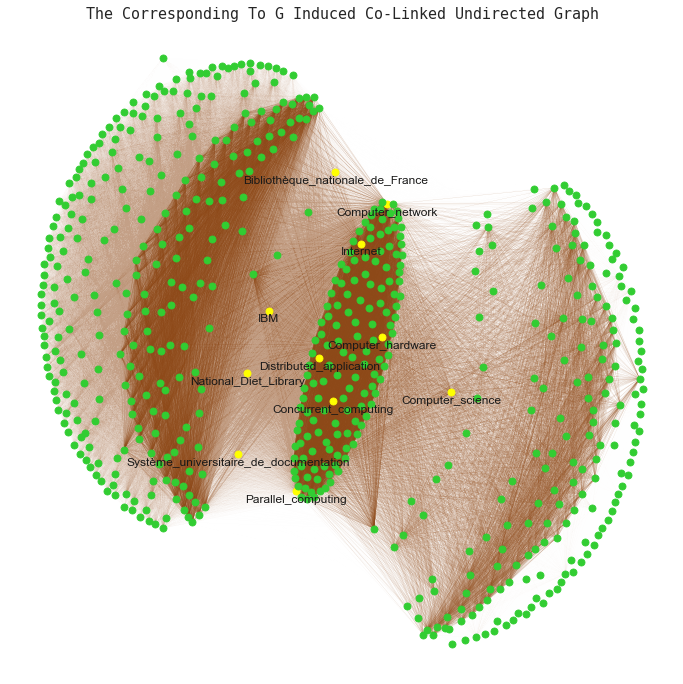

In [44]:
# First Plot without these nodes: ['Application_programming_interface', 'Concurrency_(computer_science)']

pos=graphviz_layout(Gcout1)

# top_nodes1 = ['Computer_network', 'Computer_hardware', 'Parallel_computing', 'Concurrency_(computer_science)', 'Internet', 'Distributed_application', 'Application_programming_interface', 'National_Diet_Library', 'Système_universitaire_de_documentation', 'IBM', 'Computer_science']
# top_nodes2 = ['Computer_network', 'Computer_hardware', 'Parallel_computing', 'Concurrency_(computer_science)', 'Internet', 'Distributed_application', 'Concurrent_computing', 'National_Diet_Library', 'Bibliothèque_nationale_de_France', 'Système_universitaire_de_documentation', 'Computer_science']

top_nodes1 = ['Computer_network', 'Computer_hardware', 'Parallel_computing', 'Internet', 'Distributed_application', 'National_Diet_Library', 'Concurrent_computing', 'Bibliothèque_nationale_de_France', 'Système_universitaire_de_documentation', 'IBM', 'Computer_science']
top_nodes2 = ['Computer_network', 'Computer_hardware', 'Concurrency_(computer_science)', 'Application_programming_interface', 'National_Diet_Library', 'Concurrent_computing', 'Bibliothèque_nationale_de_France', 'Système_universitaire_de_documentation', 'IBM', 'Computer_science']

rem_nodes1 = [z for z in Gcout1.nodes() if z not in top_nodes1]   # rem_nodes represents remaining nodes top_nodes1
rem_nodes2 = [z for z in Gcout1.nodes() if z not in top_nodes2]   # rem_nodes represents remaining nodes top_nodes
labels = {}
# threshold = 500 #play around with number
for n in Gcout1.nodes():
    if n not in top_nodes1:
    # if Gcout1.degree(n) < threshold:
        labels[n]=" "
    else:
        labels[n]=n
        
edge_width1 = edge_width.copy()
edge_width1 = [0.003*e for e in edge_width1]
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcout1, pos, width=edge_width1, edge_color="saddlebrown", alpha=0.4)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=top_nodes1, node_size=50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=rem_nodes1, node_size=50, node_color="limegreen", alpha=1)
# nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
# nx.draw_networkx_labels(Gcout1, pos, labels=labels)
plt.axis('off');
# yoffset = {}
xyoffset = {}
# y_off = -10  # offset on the y axis
y_off = -2  # offset on the y axis
# xoffset = {}
# y_off = -10  # offset on the y axis
x_off = 0  # offset on the y axis
for k, v in pos.items():
    l = len(k)
    xyoffset[k] = (v[0]+x_off*l, v[1]+y_off)
#     xoffset[k] = (v[0]+y_off, v[1])
# pos[p] = (pos[p][0]+xOffSet,pos[p][1]+yOffSet)
nx.draw_networkx_labels(Gcout1, xyoffset, labels=labels);
# nx.draw_networkx_labels(Gcout1, xoffset, labels=labels);
plt.title(name.title(),fontsize=15);

###### Second Plot without these nodes: ['Internet', 'Distributed_application', 'Parallel_computing']

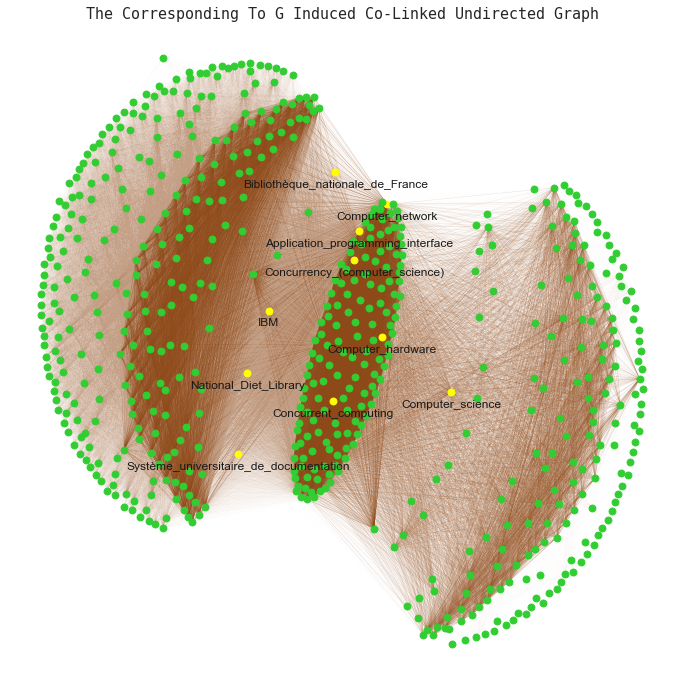

In [45]:
# Second Plot without these nodes: ['Internet', 'Distributed_application', 'Parallel_computing']

labels = {}
for n in Gcout1.nodes():
    if n not in top_nodes2:
    # if Gcout1.degree(n) < threshold:
        labels[n]=" "
    else:
        labels[n]=n
        
edge_width1 = edge_width.copy()
edge_width1 = [0.003*e for e in edge_width1]
        
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcout1, pos, width=edge_width1, edge_color="saddlebrown", alpha=0.4)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=top_nodes2, node_size=50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=rem_nodes2, node_size=50, node_color="limegreen", alpha=1)
plt.axis('off');

# yoffset = {}
xyoffset = {}
y_off = -3  # offset on the y axis
x_off = 0  # offset on the y axis

for k, v in pos.items():
    l = len(k)
    xyoffset[k] = (v[0]+x_off*l, v[1]+y_off)
    
nx.draw_networkx_labels(Gcout1, xyoffset, labels=labels);
plt.title(name.title(),fontsize=15);

###### Third Plot with no nodes left out. Plot shows overlap of the node labels

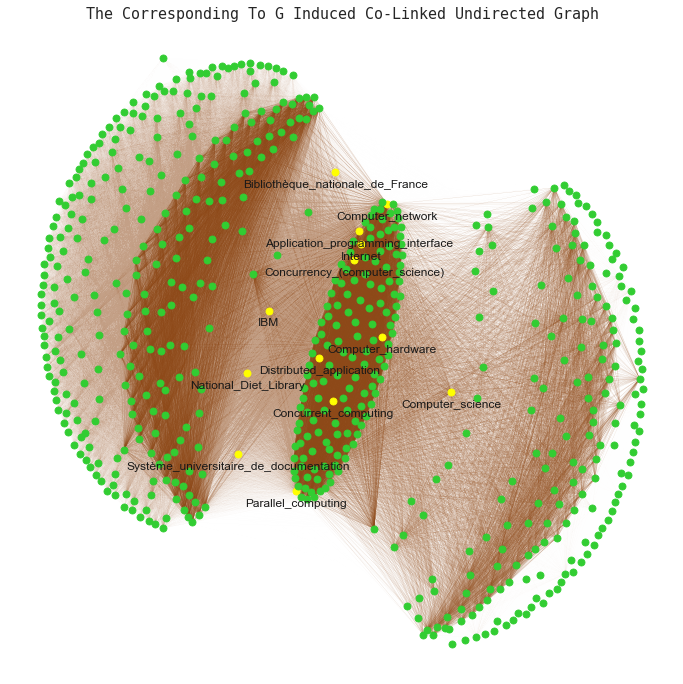

In [46]:
# Third Plot with no nodes left out: Plot would show overlap of the node labels

top_nodes3 = ['Computer_network', 'Computer_hardware', 'Parallel_computing', 'Concurrency_(computer_science)', 'Internet', 'Distributed_application', 'Application_programming_interface', 'National_Diet_Library', 'Concurrent_computing', 'Bibliothèque_nationale_de_France', 'Système_universitaire_de_documentation', 'IBM', 'Computer_science']
rem_nodes3 = [z for z in Gcout1.nodes() if z not in top_nodes3]
labels = {}
for n in Gcout1.nodes():
    if n not in top_nodes3:
    # if Gcout1.degree(n) < threshold:
        labels[n]=" "
    else:
        labels[n]=n
        
edge_width2 = edge_width.copy()
edge_width2 = [0.003*e for e in edge_width2]
        
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcout1, pos, width=edge_width2, edge_color="saddlebrown", alpha=0.4)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=top_nodes3, node_size=50, node_color="yellow", alpha=1)
nodes = nx.draw_networkx_nodes(Gcout1, pos, nodelist=rem_nodes3, node_size=50, node_color="limegreen", alpha=1)
plt.axis('off');

# yoffset = {}
xyoffset = {}
y_off = -3  # offset on the y axis
x_off = 0  # offset on the y axis

for k, v in pos.items():
    l = len(k)
    xyoffset[k] = (v[0]+x_off*l, v[1]+y_off)
    
nx.draw_networkx_labels(Gcout1, xyoffset, labels=labels);
plt.title(name.title(),fontsize=15);


#### Communities of the hyperlinked undirected graph

In [47]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

{'Systems_engineering': 0, 'Software_as_a_service': 1, 'Platform_as_a_service': 1, 'Engineering': 0, 'Security_engineering': 0, 'Information_technology_engineering': 0, 'Performance_engineering': 0, 'Infrastructure_as_a_service': 1, 'Web_engineering': 0, 'Software_engineering': 2, 'Starvation_(computer_science)': 3, 'Grid_computing': 3, 'Block_storage': 0, 'Non-uniform_memory_access': 3, 'Back-end_database': 0, 'Mobile_cloud_computing': 0, 'OpenMP': 3, 'Eucalyptus_(software)': 1, 'Startup_company': 0, 'Cloudlet': 0, 'Client–server_model': 0, 'Load_balancer': 0, 'EScience': 0, 'Vector_processor': 3, 'Application_programming_interface': 3, 'Biblioteca_Nacional_de_España': 0, 'Sandbox_(Cloud)': 0, 'Message_Passing_Interface': 3, 'Cloud_computing_issues': 0, 'G_Suite': 1, 'Business_continuity': 0, 'Process_(computing)': 3, 'Systems_architecture': 0, 'Libguestfs': 1, 'Manycore_processor': 3, 'Thread_(computing)': 3, 'Reliability_(computer_networking)': 0, 'Social_networking_service': 0, 'Al

The graph has 4 Louvain communities and modularity coefficient equal to 0.45717230499598427
Community 0 with 203 nodes: ['Software_engineering', 'Service-oriented_architecture', 'CiteSeerX', 'Scientific_computing', 'World_Wide_Web', 'Structured_programming', 'Software_design', 'Communications_of_the_ACM', 'Structured_analysis', 'Software_development', 'Concurrent_computing', 'List_of_important_publications_in_computer_science', 'List_of_pioneers_in_computer_science', 'Undecidable_problem', 'Computational_complexity_theory', 'Tony_Hoare', 'Algorithm_design', 'David_Parnas', 'Computer_program', 'Algorithm', 'Cambridge_University_Press', 'Software_architecture', 'Halting_problem', 'Theoretical_computer_science', 'Virtual_reality', 'Philosophy_of_computer_science', 'Niklaus_Wirth', 'Edsger_W._Dijkstra', 'Database', 'Formal_methods', 'Software_crisis', 'Computer_science', 'Ring_network', 'Distributed_file_system', 'Graph_(discrete_mathematics)', 'OCLC', 'FidoNet', 'Telecommunication', 'E-ma

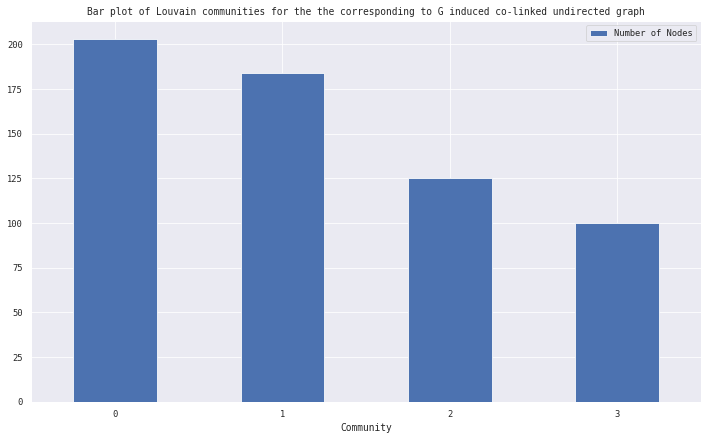

In [49]:
partition = community.best_partition(Gcout1)
print (partition)

kk=len(set(partition.values()))
modularity=community.modularity(partition, Gcout1, weight='weight')
print ('The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity)

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print ('Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0]))
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for the %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

KeyError: 'Distributed_Information_Processing'

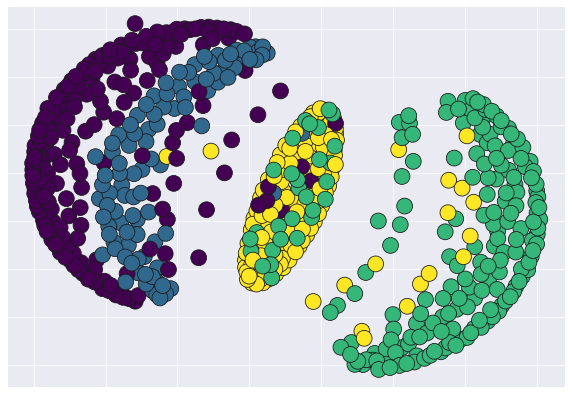

In [52]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(10,7));
node_border_color='k'

# Python 2.7 Syntax
# nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)

# Python 3 Syntax
nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=cmap, node_color=list(partition.values()),nodelist=partition.keys())

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, width=edge_width2, edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of the %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

## Co-hyperlinking undirected graph

1.2.1. Co-Linking Graph (Undirected)

1.2.2. Diagnostics (counts of nodes & edges, description of connectivity type, counts of graph density)

1.2.3. Graph Plot (in NetworkX or/and Gephi)

1.2.4. Centralities (with dataframes, plots and pairplots)

1.2.5. Communities (with membership plots and colored community partitioned graph plot)

In [53]:
G1=G.copy()
medgesin=[]
n_in=[n for n in G1.nodes() if G1.in_degree(n)>1]
for n in n_in:
    nn=list(G1.predecessors(n))
    combs=it.combinations(nn, 2)
    for j in combs:
        medgesin.append((j[0],j[1]))

name="the corresponding to G induced co-linking undirected graph"
Gcin=nx.MultiGraph()
Gcin.add_edges_from(medgesin)
Gcin=nx.MultiGraph(Gcin,name=name)

Gcin1=Gcin.copy()
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(Gcin1.edges()).items()]
Gcin1 = nx.Graph(weight)
edge_width=[Gcin1[u][v]['weight'] for u,v in Gcin1.edges()]

In [54]:
print ("Gcin is the %s with %i nodes and %i edges" %(str(Gcin),len(Gcin1.nodes()),len(Gcin1.edges())))
if nx.is_weighted(Gcin1)==True:
    print ("Gcin is a weighted undirected graph")
else:
    print ("Gcin is an unweighted undirected graph")
if nx.is_connected(Gcin)==True:
    print ("Gcin is a connected graph")
else:
    print ("Gcin is a disconnected graph and it has",nx.number_connected_components(Gcin),"connected components")    
print ("The density of Gcin is %.3f" %nx.density(G))

Gcin is the the corresponding to G induced co-linking undirected graph with 585 nodes and 82761 edges
Gcin is a weighted undirected graph
Gcin is a connected graph
The density of Gcin is 0.077


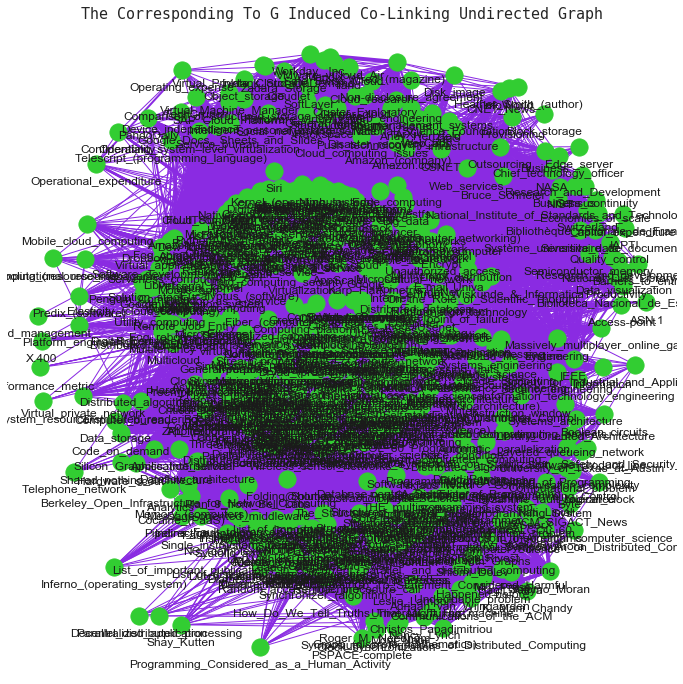

In [55]:
pos=graphviz_layout(Gcin1)
plt.figure(figsize=(12,12));
nx.draw_networkx_edges(Gcin1, pos, width=edge_width, edge_color="blueviolet", alpha=1)
nodes = nx.draw_networkx_nodes(Gcin1, pos, node_color="limegreen", alpha=1)
# nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
# nx.draw_networkx_labels(Gcin1, pos)
plt.axis('off');
yoffset = {}
y_off = -7  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gcin, yoffset);
plt.title(name.title(),fontsize=15);

## Communities of the hyperlinking undireceted graph

The graph has 4 Louvain communities and modularity coefficient equal to 0.45717230499598427
Community 0 with 203 nodes: ['Software_engineering', 'Service-oriented_architecture', 'CiteSeerX', 'Scientific_computing', 'World_Wide_Web', 'Structured_programming', 'Software_design', 'Communications_of_the_ACM', 'Structured_analysis', 'Software_development', 'Concurrent_computing', 'List_of_important_publications_in_computer_science', 'List_of_pioneers_in_computer_science', 'Undecidable_problem', 'Computational_complexity_theory', 'Tony_Hoare', 'Algorithm_design', 'David_Parnas', 'Computer_program', 'Algorithm', 'Cambridge_University_Press', 'Software_architecture', 'Halting_problem', 'Theoretical_computer_science', 'Virtual_reality', 'Philosophy_of_computer_science', 'Niklaus_Wirth', 'Edsger_W._Dijkstra', 'Database', 'Formal_methods', 'Software_crisis', 'Computer_science', 'Ring_network', 'Distributed_file_system', 'Graph_(discrete_mathematics)', 'OCLC', 'FidoNet', 'Telecommunication', 'E-ma

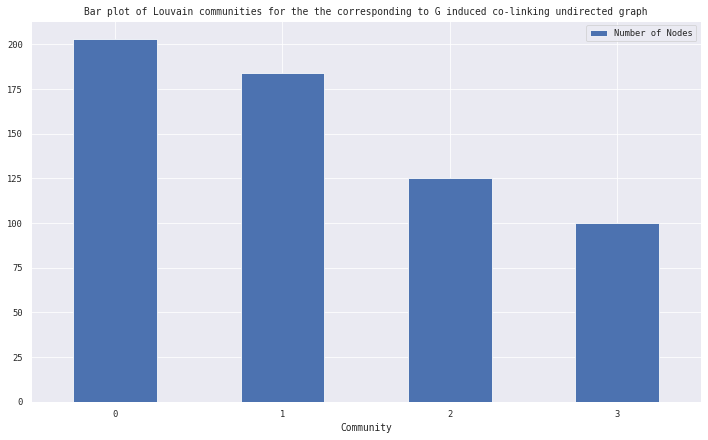

In [56]:
partition = community.best_partition(Gcout1)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, Gcout1, weight='weight')
print ('The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity)

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd

# Python 2.7 Syntax
# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)

# Python 3 Syntax
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)

eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print ('Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0]))
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for the %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

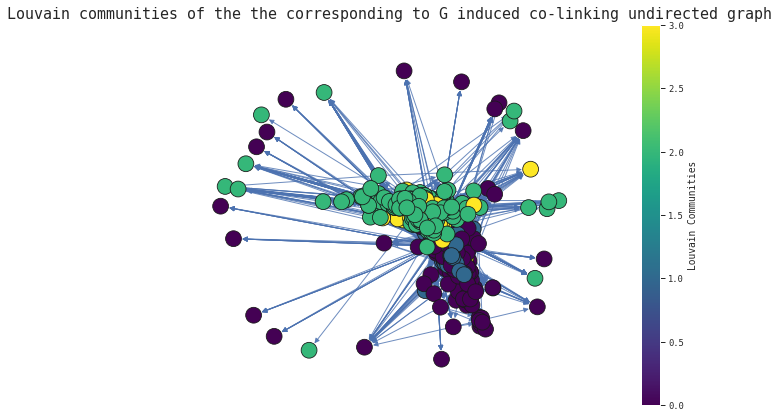

In [57]:
# Error: NetworkXError: Node 'Community_cloud' has no position.
# You need to create the node positions after you have built the graph 
# (added all edges and nodes) and before you draw it
pos=nx.spring_layout(G)


node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(10,7));
node_border_color='k'

# Python 2.7 Syntax
# nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)

# Python 3 Syntax
nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=cmap, node_color=list(partition.values()),nodelist=partition.keys())

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of the %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

## Largest Strongly Connected Component

2.1. Largest Strong Connected Component of Graph (Directed)

2.2. Diagnostics (counts of nodes & edges, description of connectivity type, counts of graph density and reciprocity)

2.3. Graph Plot (in NetworkX or/and Gephi)

2.4. Centralities (with dataframes, plots and pairplots)

In [58]:
largest = max(nx.strongly_connected_components(G), key=len)
len(largest)
GLCC = G.subgraph(largest)
print (len(GLCC.nodes()),len(GLCC.edges()))

549 27888


In [59]:
#Description of strongly connected component

if GLCC.is_multigraph()==True:
    print ("The largest strongly connected component of G is a multigraph")
else:
    print ("The largest strongly connected component of G is a simple graph")
if nx.is_weighted(GLCC)==True:
    print ("The largest strongly connected component of G is a weighted graph")
else:
    print ("The largest strongly connected component of G is an unweighted graph")
if GLCC.is_directed()==True:
    print ("The largest strongly connected component of G is a directed graph")
else:
    print ("The largest connected component of G is an undirected graph")    
if nx.is_bipartite(GLCC)==True:
    print ("The largest strongly connected component of G is a bipartite graph")
else:
    print ("The largest strongly connected component of G is not a bipartite graph")    
if nx.is_tree(GLCC)==True:
    print ("The largest strongly connected component of G is a tree")
else:
    print ("The largest strongly connected component of G is not a tree") 
if GLCC.is_directed()==False:
    if nx.is_connected(GLCC)==True:
        print ("The largest connected component of G is a connected graph")
    else:
        print ("The largest connected component of G is a disconnected graph and it has",nx.number_connected_components(GLCC),"connected components")    
else:
    if nx.is_strongly_connected(GLCC)==True:
        print ("The largest strongly connected component of G is a strongly connected graph")
    else:
        print ("The largest strongly connected component of G is not strongly connected and it has",nx.number_strongly_connected_components(GLCC),"strongly connected components")
    if nx.is_weakly_connected(GLCC)==True:
        print ("The largest strongly connected component of G is a weakly connected graph")
    else:
        print ("The largest strongly connected component of G is not weakly connected and it has",nx.number_weakly_connected_components(GLCC),"weakly connected components")    
if len(list(nx.isolates(GLCC)))>0:
    print ("The largest strongly connected component of G has",len(list(nx.isolates(GLCC))),"isolates")
else:
    print ("The largest strongly connected component of G has no isolates")
    
print ("The largest strongly connected component of G has reciprocity = ", nx.reciprocity(GLCC))

The largest strongly connected component of G is a simple graph
The largest strongly connected component of G is an unweighted graph
The largest strongly connected component of G is a directed graph
The largest strongly connected component of G is not a bipartite graph
The largest strongly connected component of G is not a tree
The largest strongly connected component of G is a strongly connected graph
The largest strongly connected component of G is a weakly connected graph
The largest strongly connected component of G has no isolates
The largest strongly connected component of G has reciprocity =  0.5452524383247275


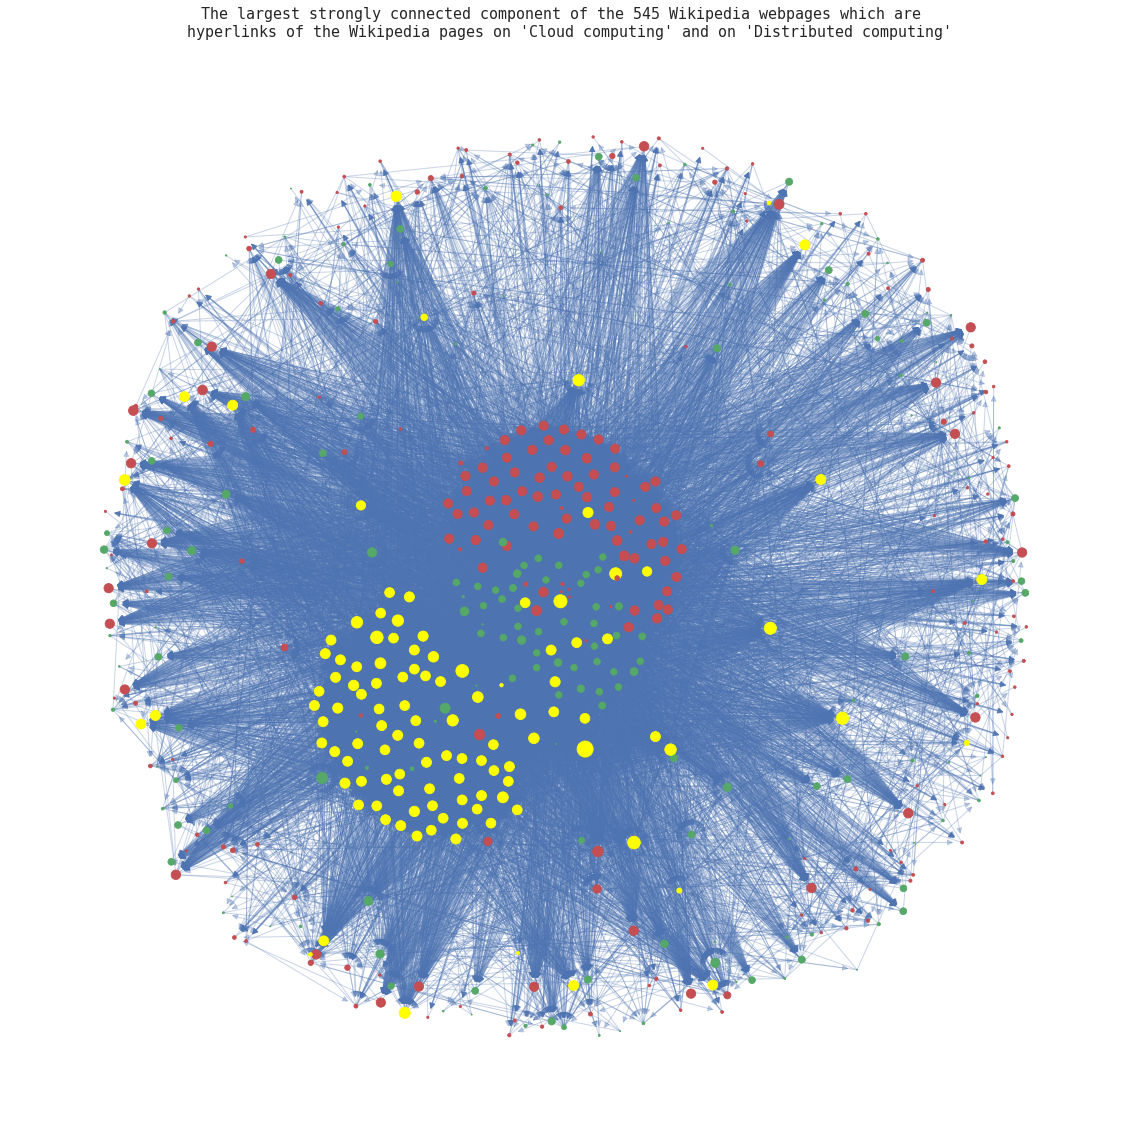

In [60]:
#Spring_Layout
uGLCC = nx.DiGraph(GLCC) #unfreeze graph
# Detect and remove nodes with non-ascii characters
nas=[]
for a in uGLCC.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
# GLCC.remove_nodes_from(nas)
for x in nas:
    uGLCC.remove_node(x)


#pos = nx_agraph.graphviz_layout(uGLCC) #This gives an error

#pos=graphviz_layout(uGLCC)

pos=nx.spring_layout(uGLCC,1.)#will handle non-ascii characters

type={}
for n in uGLCC.nodes():
    if n in p1 and n not in p2:
        type[n]='r'
    elif n in p2 and n not in p1:
        type[n]='g'
    else:
        type[n]='yellow'
plt.figure(figsize=(20,20));
nodes = nx.draw_networkx_nodes(uGLCC, pos, node_color=type.values(),node_size=list(dict(uGLCC.in_degree()).values())) #, alpha=0.2)
nx.draw_networkx_edges(uGLCC, pos,arrowsize=12, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The largest strongly connected component of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia pages on '%s' and on '%s'" %(len(uGLCC.nodes()),page1.title,page2.title)
plt.title(ss,fontsize=15);
# plt.margins(x=0.3, y=0) 

In [61]:
def create_centralities_list(GLCC,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','betweenness','eigenvector','Katz','PageRank','HITS','load','communicability','current flow']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(GLCC,nx.DiGraph):
                cent=nx.in_degree_centrality(GLCC)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(GLCC)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(GLCC)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(GLCC)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(GLCC)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(GLCC, nx.DiGraph):
                cent=nx.communicability_betweenness_centrality(GLCC)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(GLCC)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(GLCC, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(GLCC)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(GLCC,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
            cent=nx.katz_centrality_numpy(GLCC,1/phi-0.01)
            cent=nx.katz_centrality_numpy(GLCC,.05)#,1/phi-0.01)
            
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent
#             valus[centr+'_%i' %pphi]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(GLCC)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(GLCC,nx.DiGraph):
                dd=nx.hits(GLCC,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(GLCC)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        else:
            continue
#         print '%s done!!!' %sstt
    return valus

dindices=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices=['degree','closeness','betweenness','eigenvector']

# Without 'communicability' and 'current flow' (undirected case)
dindicesd=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indicesd=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load']
# indicesd=['degree','closeness','betweenness','eigenvector']

dindicesdr=dindices
indicesdr=indices

# Plus 'node'
dindicesdrn=["node"]+dindices
indicesdrn=['node']+indices

def centralGLCC_df(GLCC,node,centralGLCC_pd):
    centralGLCC_pd[node]=centralGLCC_pd.index.values
    if isinstance(GLCC,nx.DiGraph):
        centralGLCC_pd=centralGLCC_pd[[node]+dindices]
    else:
        centralGLCC_pd=centralGLCC_pd[[node]+indices]
    centralGLCC_pd[node]=centralGLCC_pd.index.values
    centralGLCC_pd.reset_index(drop = True, inplace = True)
    # centralGLCC_pd=centralGLCC_pd[['node']]
    centralGLCC_pd.sort_values(node) #.head()
    # centralGLCC_pd['node']=GLCC.nodes()
    return centralGLCC_pd

In [62]:
centralGLCC_pd=pd.DataFrame(create_centralities_list(GLCC))
node="node"
centralGLCC_df(GLCC,node,centralGLCC_pd)

node  out_degree  in_degree  \
0                                    ACM_SIGACT_News    0.005474   0.001825   
1                                           ALGOL_60    0.010949   0.089416   
2                                            ARPANET    0.031022   0.049270   
3                                              ASN.1    0.001825   0.010949   
4                                               AT&T    0.003650   0.021898   
5                        A_Discipline_of_Programming    0.007299   0.083942   
6                            A_Method_of_Programming    0.007299   0.083942   
7    A_Note_on_Two_Problems_in_Connexion_with_Graphs    0.177007   0.082117   
8                   A_Primer_of_ALGOL_60_Programming    0.209854   0.082117   
9                          Abiquo_Enterprise_Edition    0.178832   0.160584   
10                                 Abstraction_layer    0.012774   0.091241   
11                                      Access-point    0.003650   0.009124   
12                           Adriaan_van_Wijngaarden    0.009124   0.089416   
13                                         Algorithm    0.025547   0.127737   
14                                  Algorithm_design    0.025547   0.125912   
15                                            Alpha7    0.173358   0.160584   
16                                        Amazon.com    0.025547   0.032847   
17                                  Amazon_(company)    0.023723   0.032847   
18                      Amazon_Elastic_Compute_Cloud    0.182482   0.040146   
19                               Amazon_Web_Services    0.202555   0.195255   
20                                      Amdahl's_law    0.193431   0.182482   
21                   Analysis_of_parallel_algorithms    0.204380   0.177007   
22                                         Analytics    0.003650   0.016423   
23                                    Andy_Hertzfeld    0.009124   0.016423   
24                                 Apache_CloudStack    0.180657   0.160584   
25                                               Api    0.031022   0.012774   
26                                          AppScale    0.189781   0.167883   
27                                        Apple_Inc.    0.043796   0.087591   
28                         Application_checkpointing    0.195255   0.182482   
29                 Application_programming_interface    0.043796   0.270073   
..                                               ...         ...        ...   
519                    University_of_Texas_at_Austin    0.001825   0.087591   
520                                           Usenet    0.016423   0.014599   
521                                Utility_computing    0.018248   0.029197   
522                                VMware_vCloud_Air    0.005474   0.162409   
523                                 Vector_processor    0.202555   0.186131   
524                          Virtual_Machine_Manager    0.016423   0.175182   
525                   Virtual_Private_Cloud_OnDemand    0.005474   0.162409   
526                                Virtual_appliance    0.014599   0.169708   
527                                 Virtual_machines    0.047445   0.014599   
528                            Virtual_private_cloud    0.177007   0.164234   
529                          Virtual_private_network    0.003650   0.031022   
530                                  Virtual_reality    0.034672   0.043796   
531                                   Virtualization    0.038321   0.065693   
532                              Volunteer_computing    0.010949   0.014599   
533                                       Wakame-vdc    0.175182   0.160584   
534                                        WaveMaker    0.175182   0.160584   
535                    Weakest_precondition_calculus    0.167883   0.082117   
536                                          Web_API    0.175182   0.167883   
537                                          Web_app    0.007299   0.010949   
538                

In [63]:
h = 5 # number of top centralities
cgdf=centralGLCC_df(GLCC,node,centralGLCC_pd)
DFCG={}
for c in dindices:
    dfcg=cgdf[['node',c]].sort_values(c, ascending=False).reset_index(drop=True)[:h]
    DFCG[c]=dfcg

for k,v in DFCG.items():
    print ("centrality index:",k)
    print (v)

centrality index: out_degree
                             node  out_degree
0  Concurrency_(computer_science)    0.709854
1            Cloud_infrastructure    0.658759
2               Smarter_Computing    0.658759
3                   Web_computing    0.658759
4                 Computing_power    0.658759
centrality index: in_degree
                                 node  in_degree
0                    Computer_network   0.474453
1      Concurrency_(computer_science)   0.317518
2                  Parallel_computing   0.302920
3                   Computer_hardware   0.293796
4  Synchronization_(computer_science)   0.290146
centrality index: closeness
                             node  closeness
0                Computer_network   0.615730
1               Computer_hardware   0.550201
2              Parallel_computing   0.535156
3  Concurrency_(computer_science)   0.533593
4                        Internet   0.532039
centrality index: betweenness
                             node  betweennes

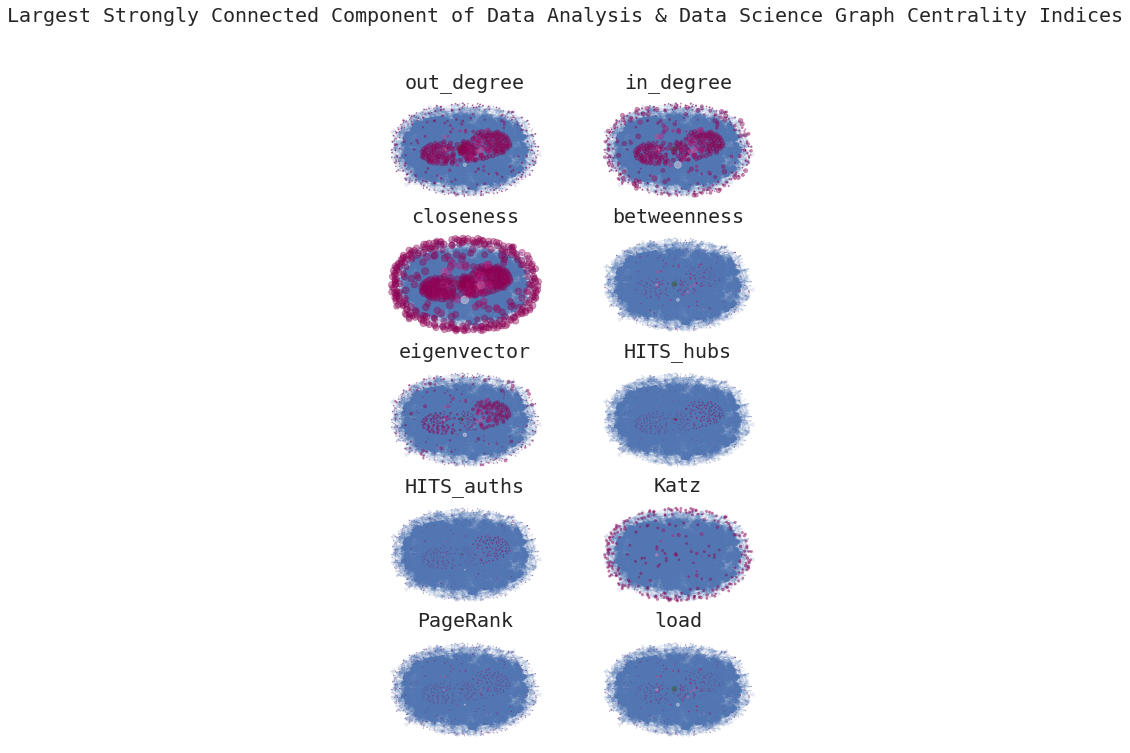

In [64]:
#might need to adjust sizes of nodes
name="Largest Strongly Connected Component of Data Analysis & Data Science Graph"

pos=nx.spring_layout(GLCC,1.)
valus=create_centralities_list(GLCC,maxiter=2000,pphi=5,centList=[])
if isinstance(GLCC,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(GLCC): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(GLCC,pos=pos,nodelist=valus[j].keys(),
                               node_size=[100*x for x in valus[j].values()], #adjust node size here
                               node_color=nodeclo,
                               cmap=plt.cm.PiYG,alpha=0.4) #Reds
    nx.draw_networkx_edges(GLCC,pos=pos,edge_color='b', alpha=0.1)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

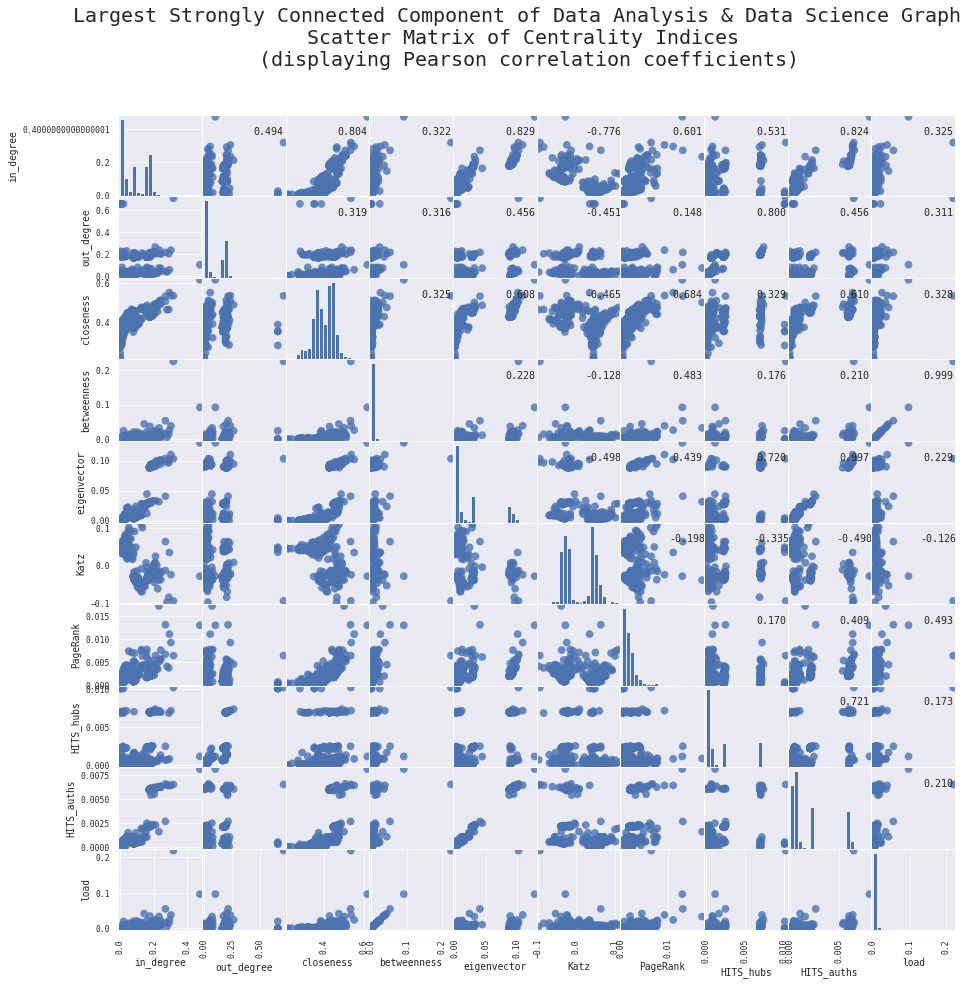

In [65]:
axes = pd.plotting.scatter_matrix(centralGLCC_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = centralGLCC_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);